In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

python -m pip install statsmodels 

In [4]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Read the data
df = pd.read_csv('AirPassengers.csv')

# Check the data types and the first few rows
print(df.info())
print(df.head())

# Convert the index to datetime if it's not already
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Splitting the data into train and test sets
train_data = df[:int(0.8*(len(df)))]
test_data = df[int(0.8*(len(df))):]

# Fitting the ARIMA model
model = ARIMA(train_data['#Passengers'], order=(5,1,0))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test_data))[0]

# Adding forecast values to the test set for comparison
test_data['Forecast'] = forecast

# Printing the forecasted values
print(test_data[['#Passengers', 'Forecast']])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
                               #Passengers    Forecast
1970-01-01 00:00:00.000000115          505  500.902643
1970-01-01 00:00:00.000000116          404  500.902643
1970-01-01 00:00:00.000000117          359  500.902643
1970-01-01 00:00:00.000000118          310  500.902643
1970-01-01 00:00:00.000000119          337  500.902643
1970-01-01 00:00:00.000000120          360  500.902643
1970-01-01 00:00:00.000000121          342  500.902643
1970-01-01 00:00:00.000000122          406  500.902643
1970-01-01 00:00:00.000000123         

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Temp\ipykernel_28000\3689607793.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Read the data
df = pd.read_csv('datasets/AirPassengers.csv')

# Convert the 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' column as index
df.set_index('Month', inplace=True)

# Splitting the data into train and test sets
train_data = df[:int(0.8*(len(df)))]
test_data = df[int(0.8*(len(df))):]

# Fitting the ARIMA model
model = ARIMA(train_data['#Passengers'], order=(5,1,0))
model_fit = model.fit()

# Forecasting month by month
forecast = []
for month in range(len(test_data)):
    next_month_forecast = model_fit.forecast(steps=1)[0][0]  # Forecast for the next month
    forecast.append(next_month_forecast)
    # Update the model with the actual observation for that month
    model_fit = model_fit.append(pd.Series(test_data.iloc[month]['#Passengers'], index=[test_data.index[month]]))

# Adding forecast values to the test set for comparison
test_data['Forecast'] = forecast

# Printing the forecasted values
print(test_data[['#Passengers', 'Forecast']])


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


IndexError: invalid index to scalar variable.

Shape of the data=  (144, 2)
Column datatypes= 
 Month          object
#Passengers     int64
dtype: object
Column datatypes= 
 #Passengers    int64
dtype: object


ValueError: Could not interpret input 'Passengers'

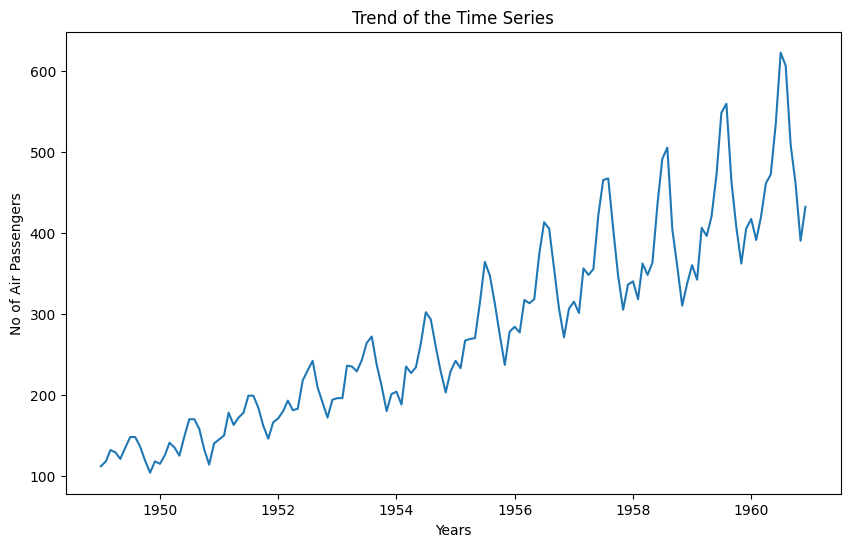

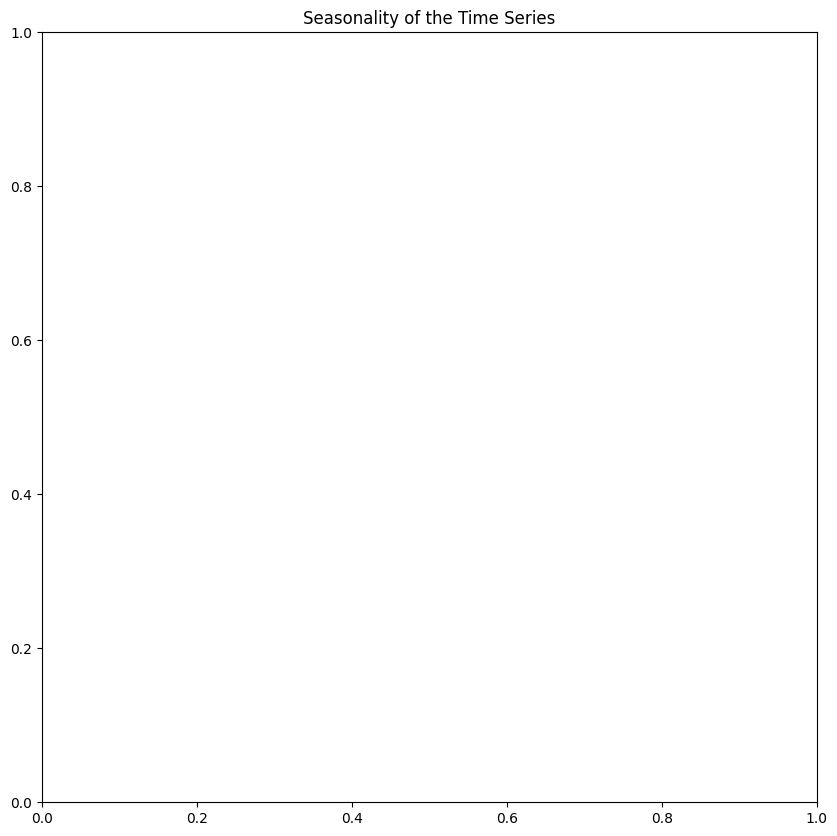

In [16]:
# -*- coding: utf-8 -*-
"""TimeSeries.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1wLUhun3fBFiTsO9MzrRw0b3bw7gChsMI
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 10, 6

df = pd.read_csv('datasets/AirPassengers.csv')
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df

df['Month'] = pd.to_datetime(df.Month)
df = df.set_index(df.Month)
df.drop('Month', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

plt.figure(figsize= (10,6))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')

df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Passengers',hue='Year',data=df_temp)

decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()

def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()

    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')
    plt.legend()
    plt.show()

    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

stationarity_test(df)